# 4.9 Intro to Data Visualization

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jmowe\OneDrive\5-9-2023 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_aggd.pkl'))

<Axes: >

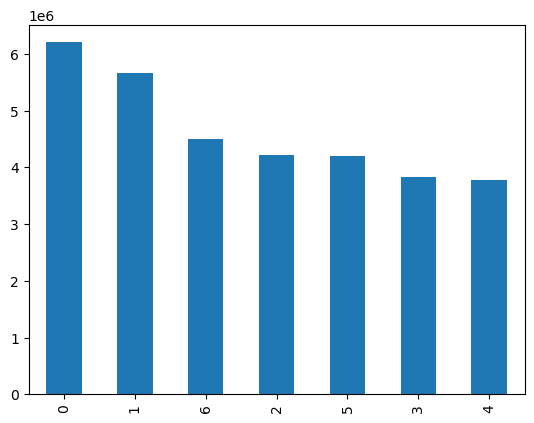

In [4]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

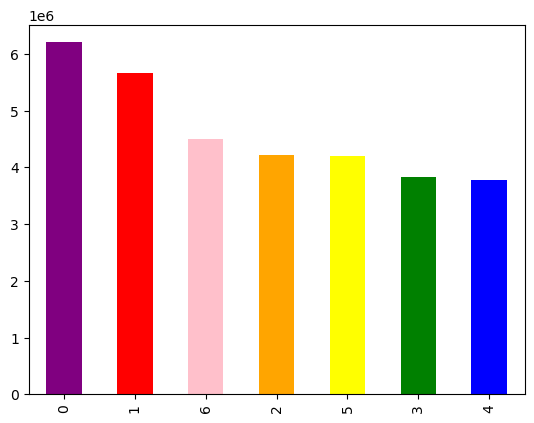

In [6]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

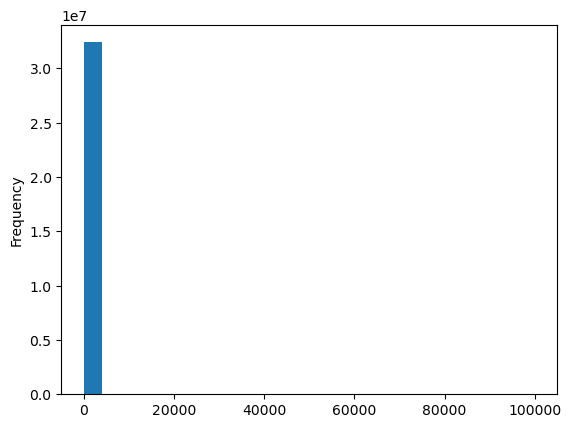

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
#max value is incorrect or an outlier

<Axes: xlabel='prices', ylabel='prices'>

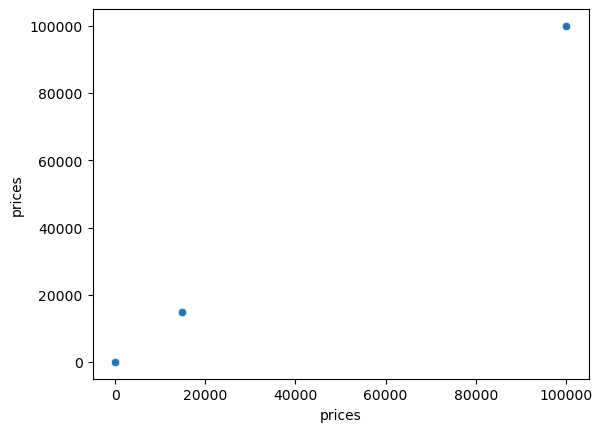

In [14]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
#locating the overpriced items

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_freq,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [16]:
#marking them as missing

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
#rechecking max values

ords_prods_merge['prices'].max()

25.0

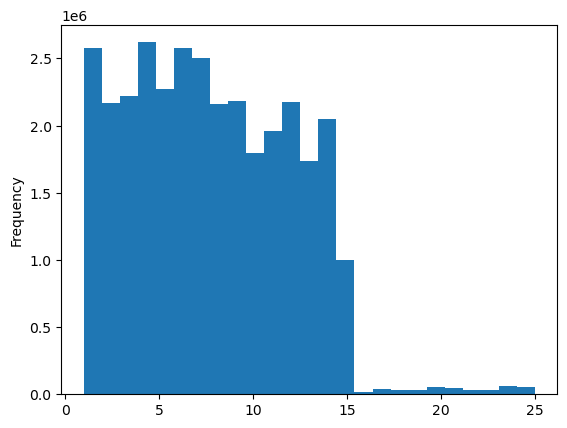

In [18]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

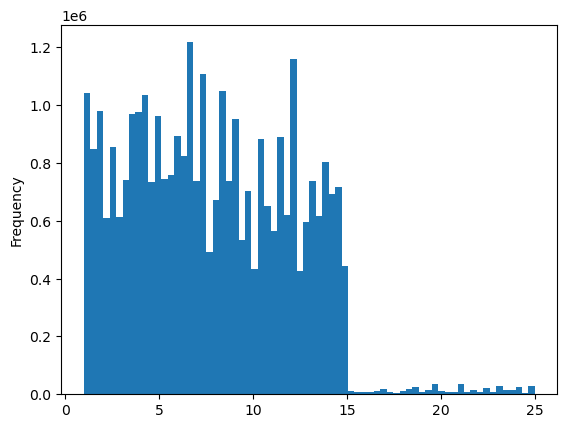

In [19]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [20]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png'))

In [21]:
#creating sampling data. the seed is the same set of random numbers. Dev is the name of list created based on the end demand "<=0.7" (len) Function is length of available random values.

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
#storing your list into two samples. big=70% small=30&

big = ords_prods_merge[dev]

In [23]:
small = ords_prods_merge[~dev]

In [25]:
#preemptively making our chart care about only the columns we want

df_2 = small[['order_day_of_week','prices']]

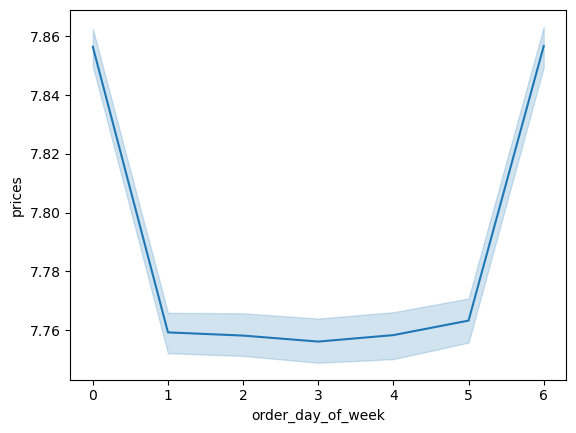

In [27]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

#blue bands around line are called error bands. representing condifence intervals

In [28]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged.pkl'))